![](https://drive.google.com/uc?id=16c6UtqGFDrJNordq9lIursSR0Ks5W8k6)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

dataset = pd.read_csv('wdbc.data')

In [ ]:
def analyze(data):
    
  # View features in data set
  print("Dataset Features")
  print(data.columns.values)
  print("=" * 30)
    
  # View How many samples and how many missing values for each feature
  print("Dataset Features Details")
  print(data.info())
  print("=" * 30)
    
  # view distribution of numerical features across the data set
  print("Dataset Numerical Features")
  print(data.describe())
  print("=" * 30)
    
  # view distribution of categorical features across the data set
  print("Dataset Categorical Features")
  print(data.describe(include=['O']))
  print("=" * 30)

In [ ]:
analyze(dataset)

Dataset Features
['842302' 'M' '17.99' '10.38' '122.8' '1001' '0.1184' '0.2776' '0.3001'
 '0.1471' '0.2419' '0.07871' '1.095' '0.9053' '8.589' '153.4' '0.006399'
 '0.04904' '0.05373' '0.01587' '0.03003' '0.006193' '25.38' '17.33'
 '184.6' '2019' '0.1622' '0.6656' '0.7119' '0.2654' '0.4601' '0.1189']
Dataset Features Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
842302      568 non-null int64
M           568 non-null object
17.99       568 non-null float64
10.38       568 non-null float64
122.8       568 non-null float64
1001        568 non-null float64
0.1184      568 non-null float64
0.2776      568 non-null float64
0.3001      568 non-null float64
0.1471      568 non-null float64
0.2419      568 non-null float64
0.07871     568 non-null float64
1.095       568 non-null float64
0.9053      568 non-null float64
8.589       568 non-null float64
153.4       568 non-null float64
0.006399    568 non-null float64
0.04904    

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


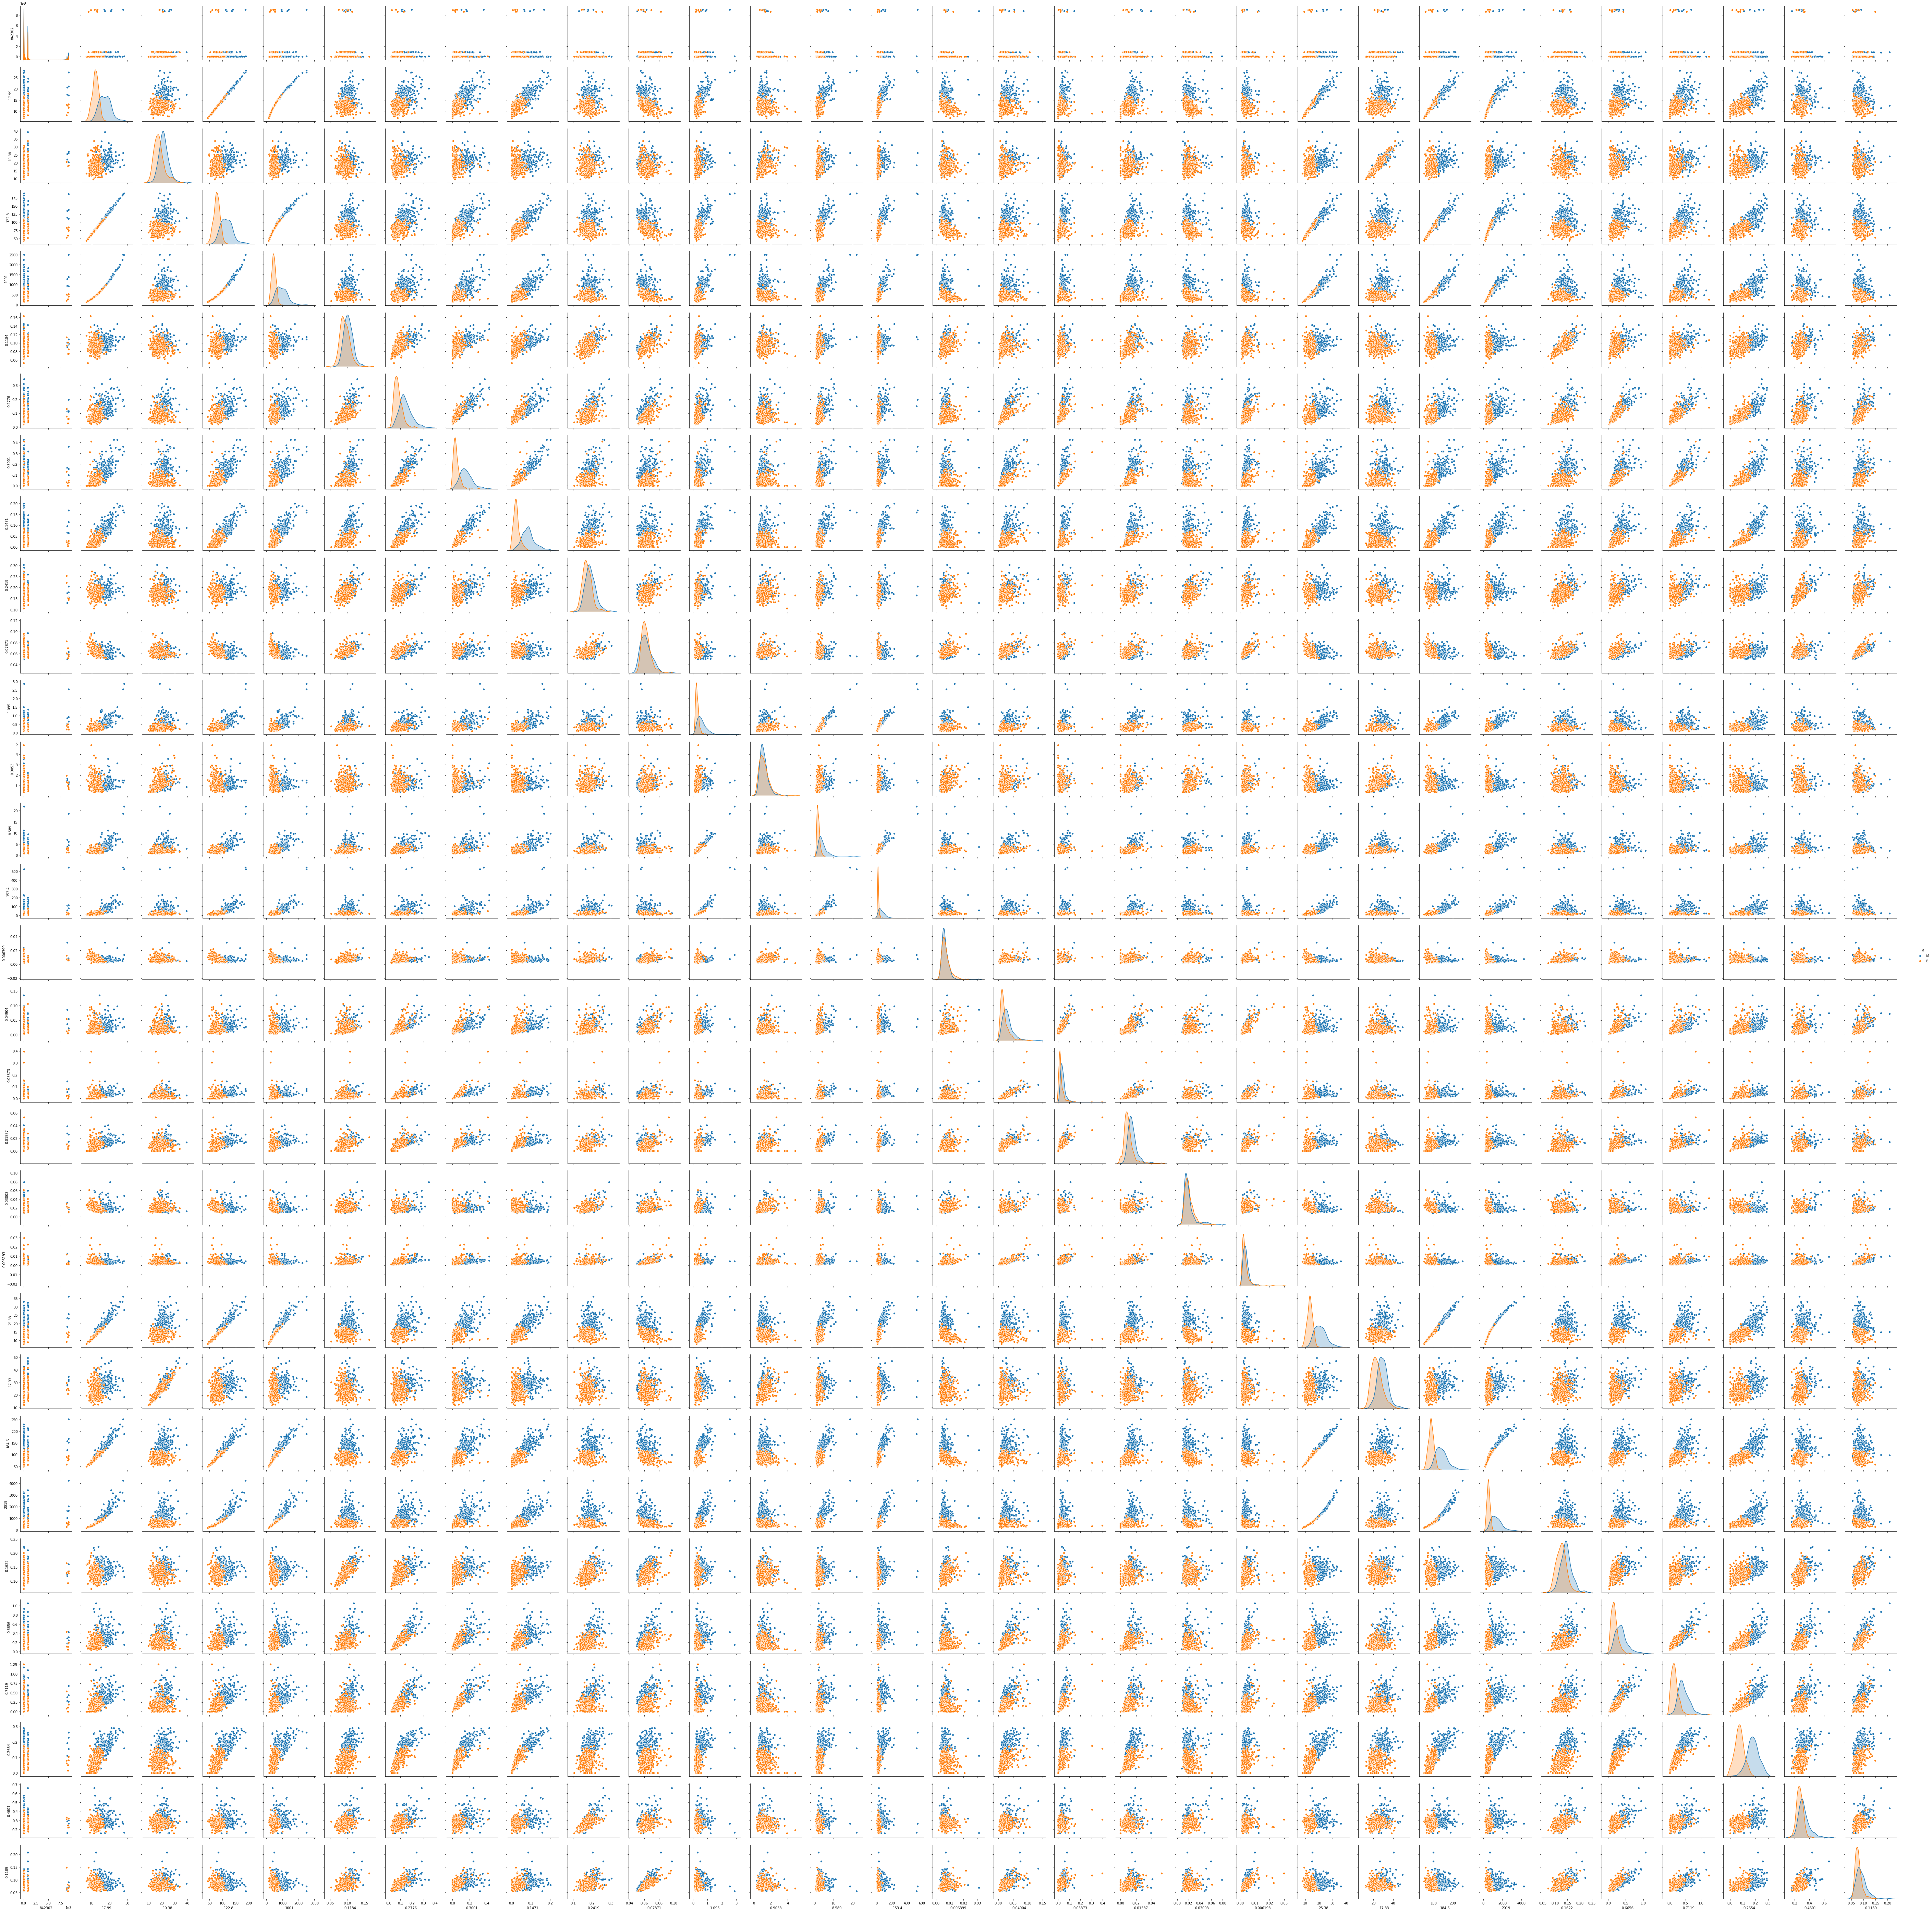

In [ ]:
sns.pairplot(dataset, hue="M", size= 2.5)

In [ ]:
X = dataset.iloc[:,2:32] 
y = dataset.iloc[:,1] 

In [ ]:
print("Earlier: ")
print(y[100:110])

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

print()
print("After: ")
print(y[100:110])

Earlier: 
100    B
101    B
102    B
103    B
104    M
105    B
106    B
107    M
108    B
109    B
Name: M, dtype: object

After: 
[0 0 0 0 1 0 0 1 0 0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scale values from faster convergence
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)

In [ ]:
parameters = {'batch_size': [1, 5],
               'epochs': [100, 120],
               'optimizer': ['adam', 'rmsprop']}

In [ ]:
# Cross validation
grid_search = GridSearchCV(estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10)

In [ ]:
# Get best model
# Note: this may take some time
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
classifier = Sequential()

In [ ]:
# Make the best classifier as we received earlier
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fit the classifier to the data

In [ ]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100, verbose=1)

Epoch 1/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 2/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 3/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 4/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 5/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 6/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 7/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 8/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 9/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000
Epoch 10/100
454/454 [==============================] - 1s 1ms/step - loss: 1.0711e-07 - acc: 1.0000

In [ ]:
y_pred = classifier.predict(X_test)
# If probab is >= 0.5 classify as 1 or 0
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [ ]:
# Finally use scikit-learn to build a confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69  2]
 [ 2 41]]


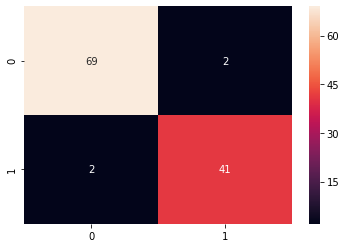

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
# (True positive + True Negative)/Total
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

Accuracy: 96.49122807017544%


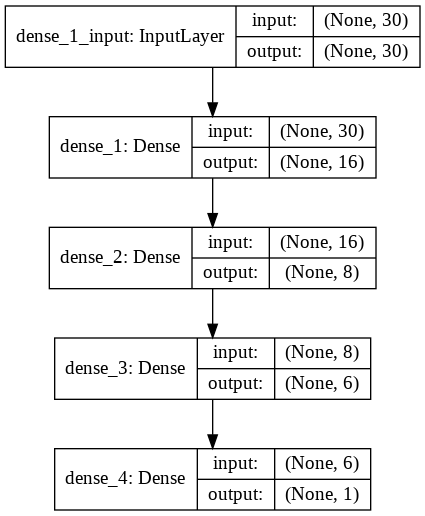

In [ ]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)